In [1]:
import torch
import numpy as np
from torchvision import transforms

In [2]:
import matplotlib.pyplot as plt
def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :]
    plt.imshow(reverse_transforms(image))

### MNIST

In [3]:
mnist_gen = torch.load("./modelSaving/mnist_gen_T_300.pt")

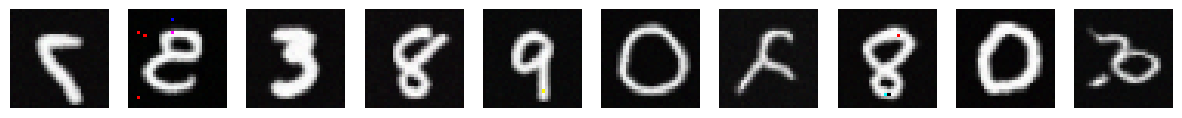

In [5]:
plt.figure(figsize=(15, 15))
for i in range(10):
    img = mnist_gen.generator()
    plt.subplot(1, 10, int(i+1))
    show_tensor_image(img.detach().cpu())
    plt.axis("off")
plt.axis("off")
plt.show()

### CelebA 

In [7]:
celebA_gen = torch.load("./modelSaving/celebA_gen_T_300.pt")

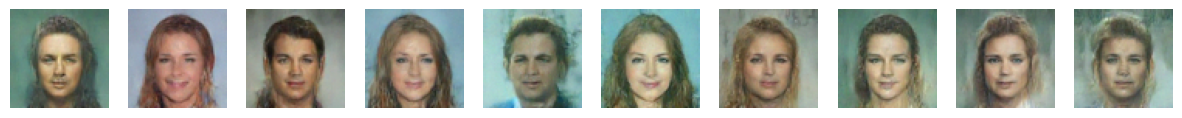

In [8]:
plt.figure(figsize=(15, 15))
for i in range(10):
    img = celebA_gen.generator()
    plt.subplot(1, 10, int(i+1))
    show_tensor_image(img.detach().cpu())
    plt.axis("off")
plt.axis("off")
plt.show()